Quantidade de atendimentos por municpio

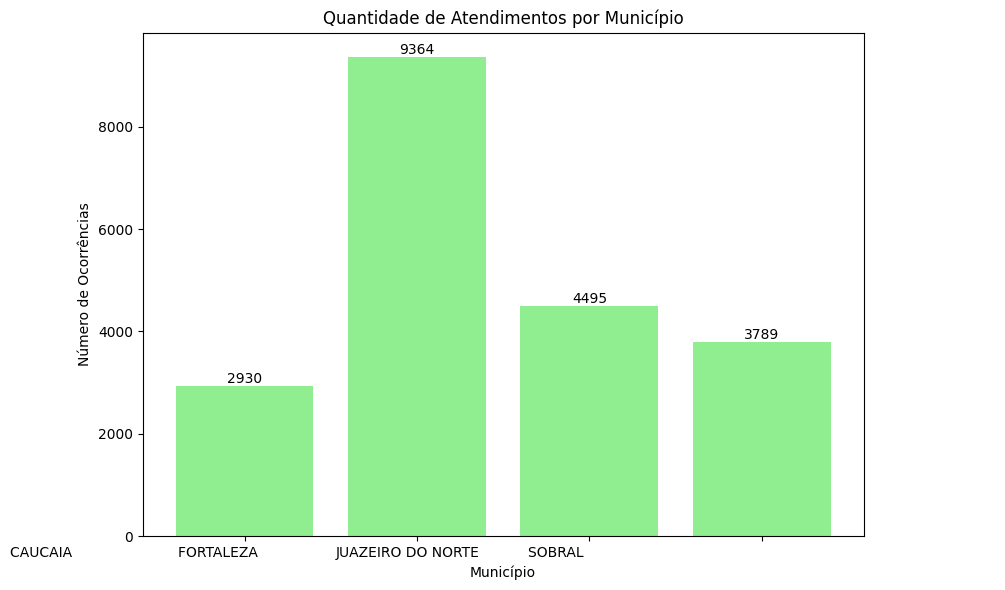

In [20]:
import locale
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

df = pd.read_csv('DADOS.txt', encoding='UTF-8', sep=',')

municipios_interesse = ['FORTALEZA', 'SOBRAL', 'CAUCAIA', 'JUAZEIRO DO NORTE'] # municipios escolhidos para análise
df_municipios = df[df['MUNICÍPIO'].str.strip().isin(municipios_interesse)]

municipio_count = df_municipios.groupby('MUNICÍPIO').size()

plt.figure(figsize=(10, 6))
bars = plt.bar(municipio_count.index, municipio_count.values, color='lightgreen')

# valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, int(yval), ha='center', va='bottom')

plt.xticks(ticks=[bar.get_x() + bar.get_width() / 2 for bar in bars], labels=municipio_count.index, ha='center')

plt.title('Quantidade de Atendimentos por Município')
plt.ylabel('Número de Ocorrências')
plt.xlabel('Município')

plt.tight_layout()
plt.show()


PIB por municipio

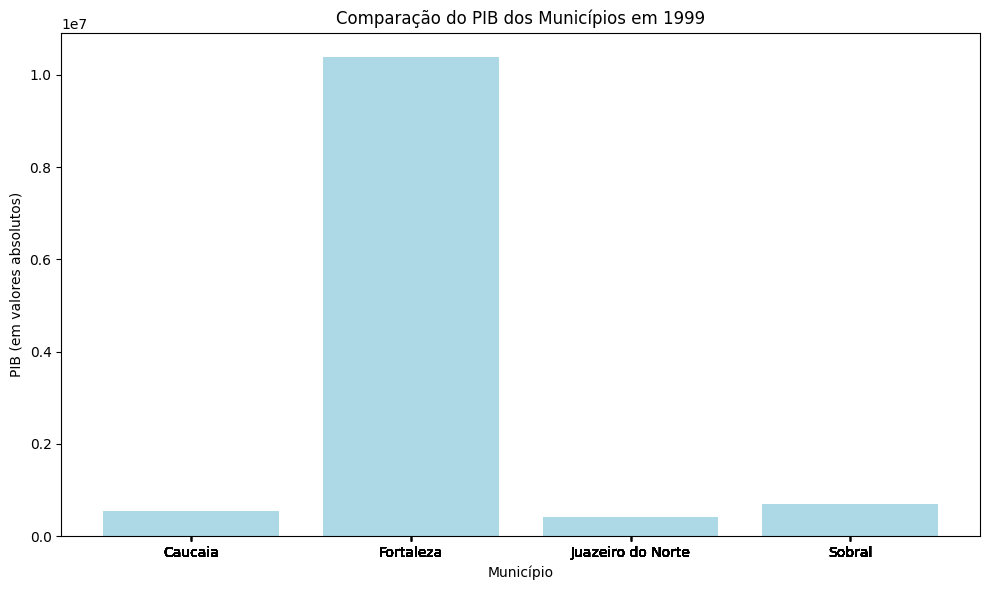

In [29]:
import locale
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

df = pd.read_csv('Produto Interno Bruto dos Municípios.csv', encoding='UTF-8', sep=',')

municipios_interesse = ['Fortaleza', 'Sobral', 'Caucaia', 'Juazeiro do Norte'] # mesmos municpios do exemplo anterior

df_municipios = df[df['Localidade'].str.strip().isin(municipios_interesse)]

df_municipios_1999 = df_municipios[['Localidade', '1999']]

plt.figure(figsize=(10, 6))
bars = plt.bar(df_municipios_1999['Localidade'], df_municipios_1999['1999'], color='lightblue')

plt.xticks(ticks=[bar.get_x() + bar.get_width() / 2 for bar in bars], labels=df_municipios_1999['Localidade'], ha='center')

plt.title('Comparação do PIB dos Municípios em 1999')
plt.ylabel('PIB (em valores absolutos)')
plt.xlabel('Município')

plt.tight_layout()
plt.show()


Taxa de escolaridade por municipio

Index(['Posição', 'Nome', 'Localidade', '2005', '2007', '2009', '2011', '2013',
       '2015', '2017', '2019', '2021', 'Unidade', 'Multiplicador'],
      dtype='object')


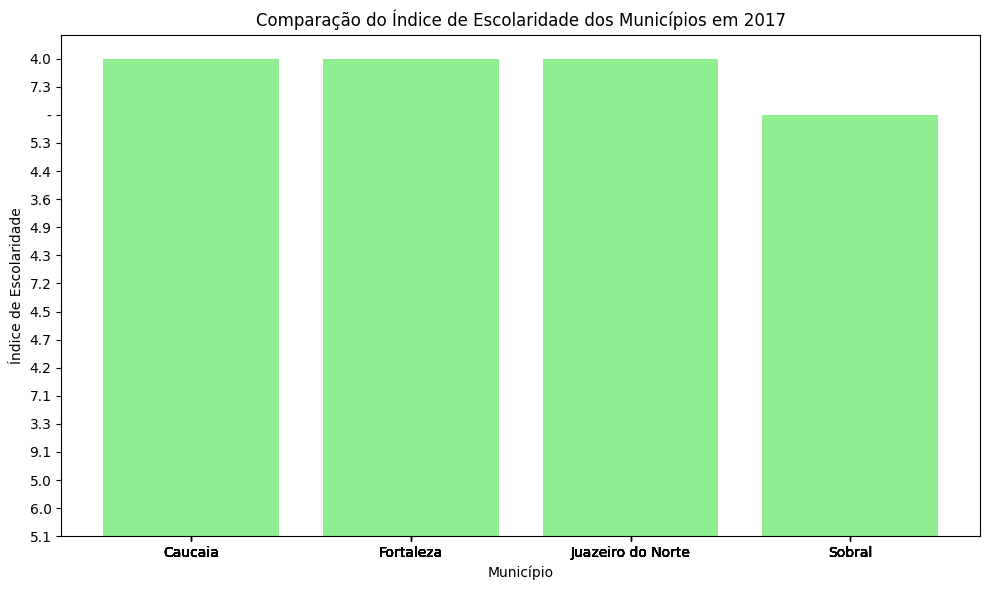

In [40]:
import locale
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

df = pd.read_csv('Índice de Desenvolvimento da Educação Básica.csv', encoding='UTF-8', sep=',')
print(df.columns)

municipios_interesse = ['Fortaleza', 'Sobral', 'Caucaia', 'Juazeiro do Norte']

df_municipios = df[df['Localidade'].str.strip().isin(municipios_interesse)]
df_municipios_2017 = df_municipios[['Localidade', '2017']]

plt.figure(figsize=(10, 6))
bars = plt.bar(df_municipios_2017['Localidade'], df_municipios_2017['2017'], color='lightgreen')

plt.xticks(ticks=[bar.get_x() + bar.get_width() / 2 for bar in bars], labels=df_municipios_2017['Localidade'], ha='center')

plt.title('Comparação do Índice de Escolaridade dos Municípios em 2017')
plt.ylabel('Índice de Escolaridade')
plt.xlabel('Município')

plt.tight_layout()
plt.show()


Grafico 3:  Raça x número de acidentes 

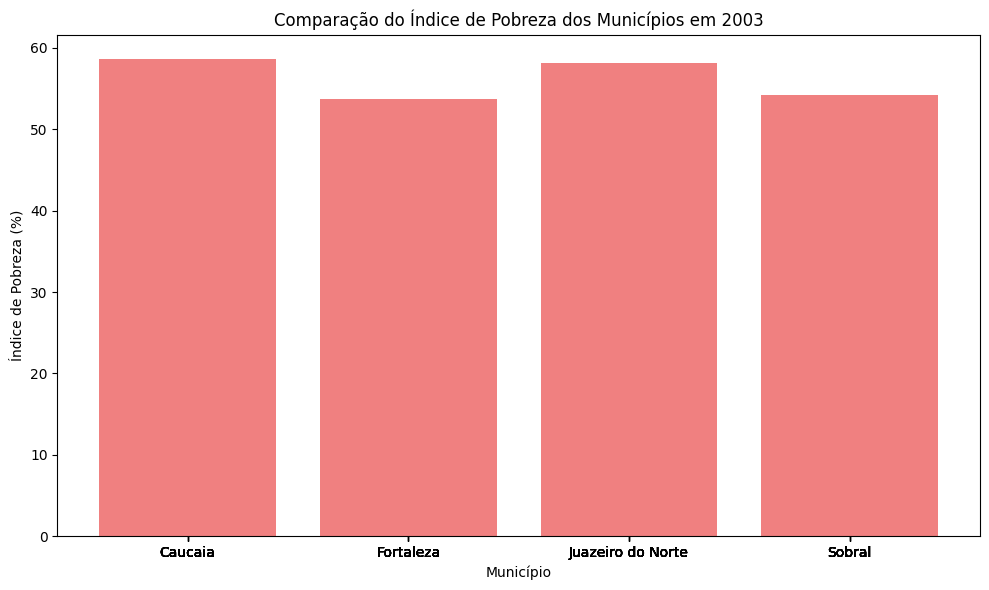

In [43]:
import locale
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')
df = pd.read_csv('Mapa de pobreza e desigualdade.csv', encoding='UTF-8', sep=',')

municipios_interesse = ['Fortaleza', 'Sobral', 'Caucaia', 'Juazeiro do Norte']
df_municipios = df[df['Localidade'].str.strip().isin(municipios_interesse)]
df_municipios_2003 = df_municipios[['Localidade', '2003']]

plt.figure(figsize=(10, 6))
bars = plt.bar(df_municipios_2003['Localidade'], df_municipios_2003['2003'], color='lightcoral')

plt.xticks(ticks=[bar.get_x() + bar.get_width() / 2 for bar in bars], labels=df_municipios_2003['Localidade'], ha='center')

plt.title('Comparação do Índice de Pobreza dos Municípios em 2003')
plt.ylabel('Índice de Pobreza (%)')
plt.xlabel('Município')

plt.tight_layout()
plt.show()


Gráfico 4: Faixa etaria x acidente por AVC

<Figure size 640x480 with 0 Axes>

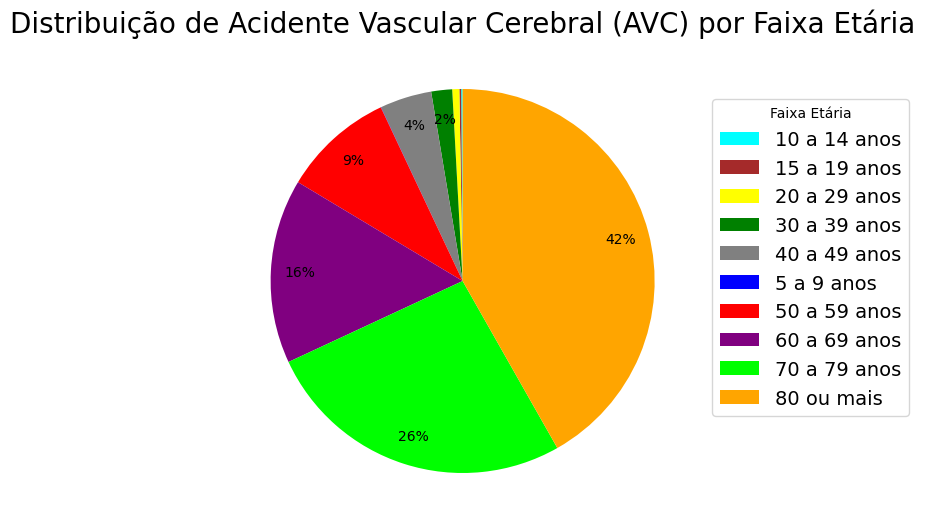

<Figure size 640x480 with 0 Axes>

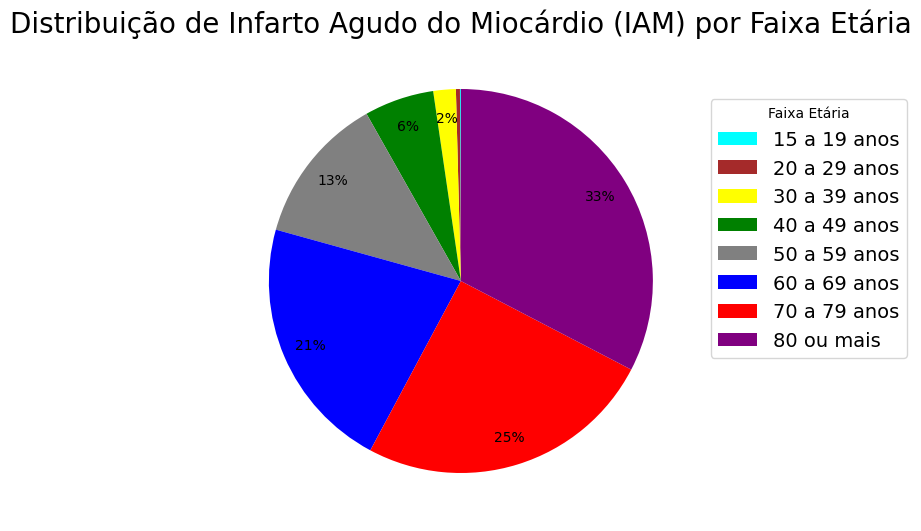

<Figure size 640x480 with 0 Axes>

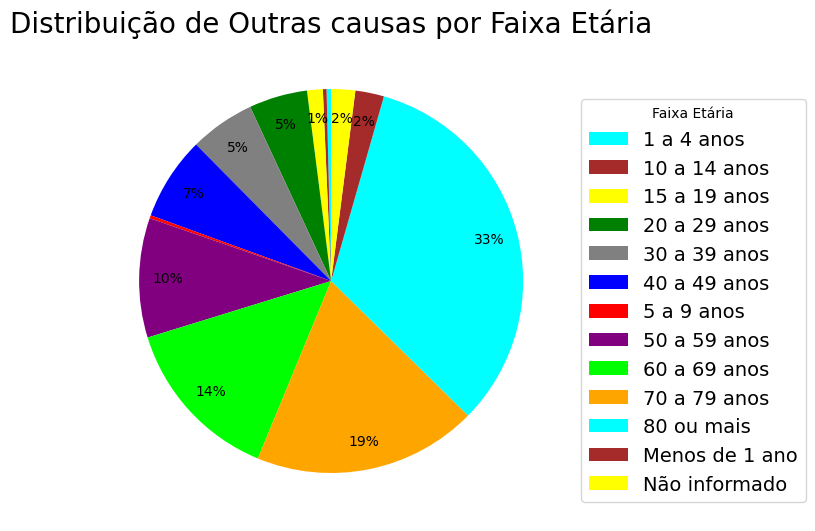

In [7]:
def autopct_format(pct):
    return ('%1.0f%%' % pct) if pct > 1 else ''

for column in df_grouped4.columns:
    plt.clf()

    sizes = df_grouped4[column].dropna().astype(float)

    if sizes.empty:
        print(f"Sem dados para {column}, pulando...")
        continue

    plt.figure(figsize=(10, 6))

    plt.pie(
        sizes, 
        autopct=autopct_format,
        startangle=90, 
        colors=['cyan', 'brown', 'yellow', 'green', 'grey', 'blue', 'red', 'purple', 'lime', 'orange'],
        labels=None,
        pctdistance=0.85
    )

    plt.title(f'Distribuição de {column} por Faixa Etária', fontsize=20)
    plt.ylabel('')

    plt.legend(
        labels=sizes.index,
        loc='upper left', 
        bbox_to_anchor=(1, 0.9), 
        fontsize=14,
        title='Faixa Etária'
    )

    plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)

    plt.show()

Gráfico 5: Número de acidentes x Região

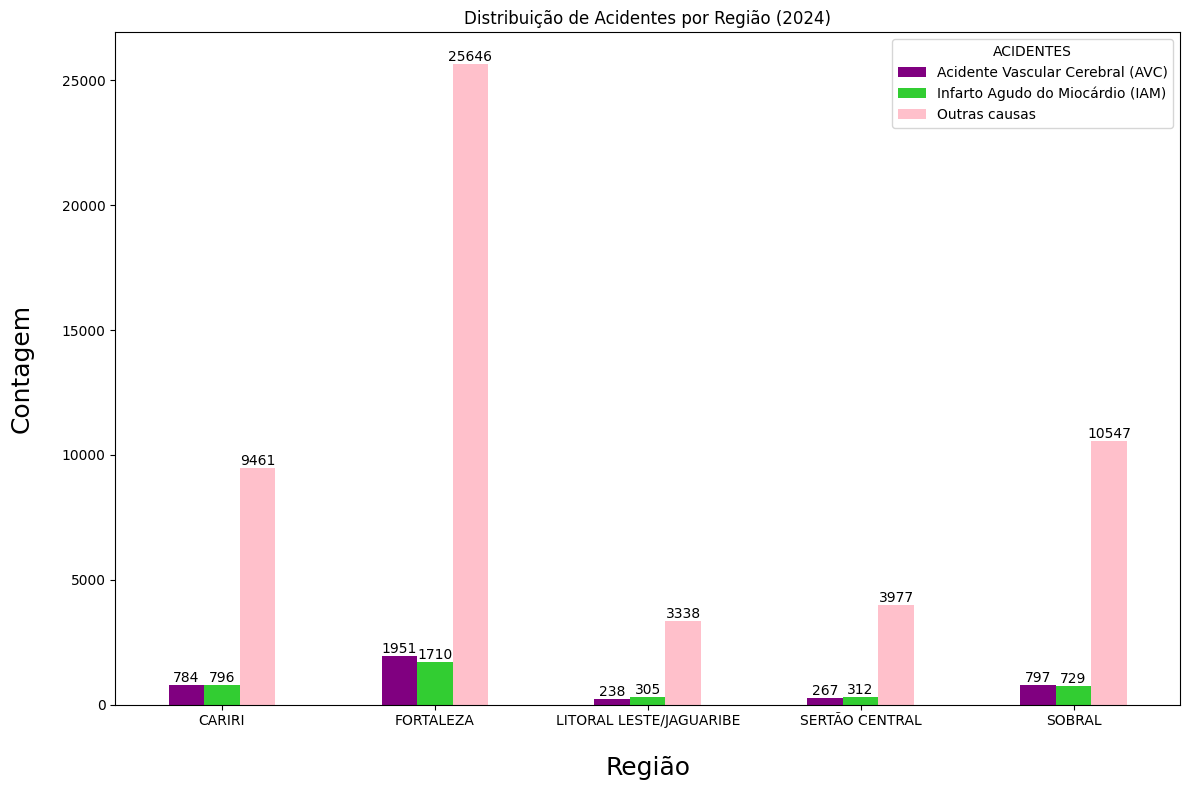

In [10]:
ax5 = df_grouped5.plot(kind='bar', figsize=(12, 8), color=['purple', 'limegreen', 'pink'], stacked=False)
ax5.set_title('Distribuição de Acidentes por Região (2024)')
ax5.set_xlabel('Região', fontsize=18, labelpad=20)
ax5.set_ylabel('Contagem', fontsize=18, labelpad=20)
plt.xticks(rotation=0)
plt.tight_layout()
add_values(ax5)  

Gráfico 6: Número de óbitos por mês 

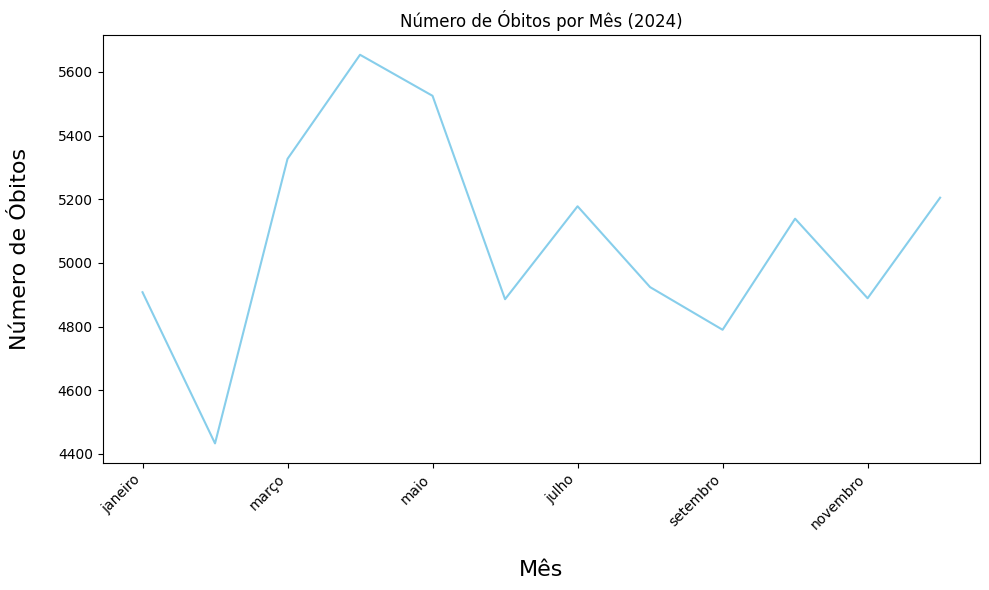

In [9]:
df['DATA_ÓBITO'] = pd.to_datetime(df['DATA_ÓBITO'], format='%Y-%m-%d', errors='coerce')
df = df.dropna(subset=['DATA_ÓBITO'])
df['MÊS'] = df['DATA_ÓBITO'].dt.strftime('%B')
df_grouped = df.groupby('MÊS').size()
df_grouped = df_grouped.reindex(pd.to_datetime(df_grouped.index, format='%B').sort_values().strftime('%B'))

plt.figure(figsize=(10,6))
df_grouped.plot(kind='line', color='skyblue')
plt.title('Número de Óbitos por Mês (2024)')
plt.xlabel('Mês', fontsize=16, labelpad=20)
plt.ylabel('Número de Óbitos', fontsize=16, labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

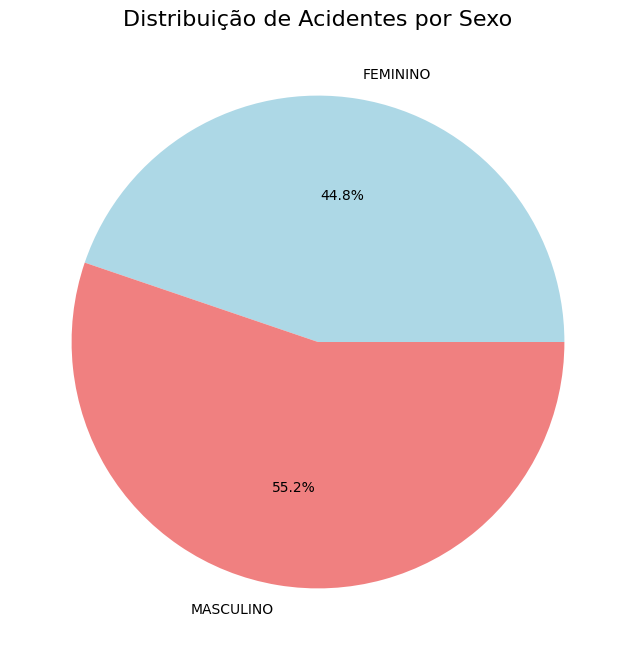

In [15]:
# Filtra os dados para remover a categoria "Não Informado"
df_filtered = df[df['SEXO'] != 'Não Informado']

# Agrupa os dados pelo sexo e conta o número de acidentes
df_sexo = df_filtered.groupby('SEXO').size()

# Cria o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df_sexo, labels=df_sexo.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
ax.set_title('Distribuição de Acidentes por Sexo', fontsize=16)

plt.show()